# Importing Libraries

In [98]:
import pandas as pd
import sklearn.datasets as datasets

# Importing Data

In [99]:
df = pd.read_csv('/content/Iris.csv')
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# **Data Preprocessing**

Drop unnecessary columns

In [100]:
df = df.drop('Id', axis = 1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Dealing with null values

In [101]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Changing Data Types

In [102]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [103]:
df.loc[df['Species'] == 'Iris-virginica' , 'Species'] = 0
df.loc[df['Species'] == 'Iris-versicolor' , 'Species'] = 1
df.loc[df['Species'] == 'Iris-setosa' , 'Species'] = 2
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


# Split Data

In [104]:
from sklearn.model_selection import train_test_split

x = df.drop('Species',axis=1)
y = df['Species'].astype(int)
x_train , x_test, y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 156 )

# Training the module

In [105]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=10)
dtree.fit(x_train , y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


# Testing the module

In [106]:
predictions = dtree.predict(x_test)
print("Predictions for x_test:" ,  predictions)

Predictions for x_test: [0 2 1 0 2 0 0 0 2 0 0 2 0 1 1 0 2 2 0 1 1 1 1 0 2 1 0 2 2 0]


# Accuracy

In [107]:
from sklearn.metrics import accuracy_score

print("Accuracy is:", accuracy_score(y_test,predictions)*100 )

Accuracy is: 96.66666666666667


# Deploying the model

In [108]:
pred = dtree.predict([[5.1	, 3.5	, 1.4 ,	0.2	]])
print("Deploying with smaple data:" , pred)

Deploying with smaple data: [2]


# **Graphical Representation**

# Importing Required Libraries

In [109]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualization

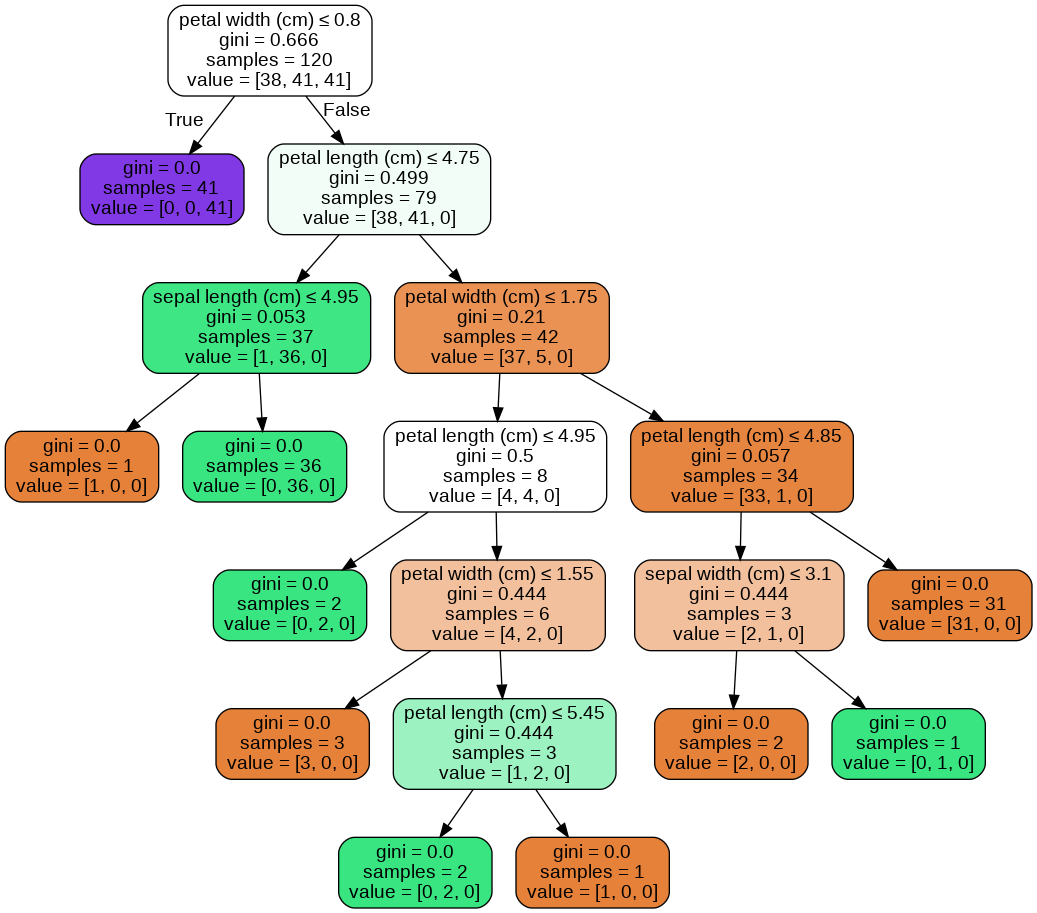

In [110]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())